In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge


In [38]:


def load_csv_and_print_top_rows(file_path):
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(file_path, header=0)
    
    # Print the first 5 rows of the DataFrame
    print("First 5 rows of the DataFrame:")
    print(df.head())
    return df

# Example usage:
# Replace 'path_to_your_file.csv' with the actual path to your CSV file
file_path = 'used_car_price_analysis.csv'
df = load_csv_and_print_top_rows(file_path)


First 5 rows of the DataFrame:
     model  year transmission  mileage fuelType    tax   mpg  engineSize  \
0   Fiesta  2017    Automatic    15944   Petrol  150.0  57.7         1.0   
1    Focus  2018       Manual     9083   Petrol  150.0  57.7         1.0   
2    Focus  2017       Manual    12456   Petrol  150.0  57.7         1.0   
3   Fiesta  2019       Manual    10460   Petrol  145.0  40.3         1.5   
4   Fiesta  2019    Automatic     1482   Petrol  145.0  48.7         1.0   

   price  
0  12000  
1  14000  
2  13000  
3  17500  
4  16500  


In [39]:


def process_dataframe(df):
    # Identify columns with missing values
    missing_cols = df.columns[df.isna().any()]
    print(f"Columns with missing values: {missing_cols}")
    
    # Fill missing values with the mean of columns
    for col in missing_cols:
        df[col].fillna(df[col].mean(), inplace=True)
    
    print("DataFrame after filling missing values with column mean:")
    print(df.head())
    
    # Remove duplicate entries
    df.drop_duplicates(inplace=True)
    
    print("DataFrame after removing duplicate entries:")
    print(df.head())

process_dataframe(df)

Columns with missing values: Index(['tax'], dtype='object')
DataFrame after filling missing values with column mean:
     model  year transmission  mileage fuelType    tax   mpg  engineSize  \
0   Fiesta  2017    Automatic    15944   Petrol  150.0  57.7         1.0   
1    Focus  2018       Manual     9083   Petrol  150.0  57.7         1.0   
2    Focus  2017       Manual    12456   Petrol  150.0  57.7         1.0   
3   Fiesta  2019       Manual    10460   Petrol  145.0  40.3         1.5   
4   Fiesta  2019    Automatic     1482   Petrol  145.0  48.7         1.0   

   price  
0  12000  
1  14000  
2  13000  
3  17500  
4  16500  
DataFrame after removing duplicate entries:
     model  year transmission  mileage fuelType    tax   mpg  engineSize  \
0   Fiesta  2017    Automatic    15944   Petrol  150.0  57.7         1.0   
1    Focus  2018       Manual     9083   Petrol  150.0  57.7         1.0   
2    Focus  2017       Manual    12456   Petrol  150.0  57.7         1.0   
3   Fiesta  

In [40]:


def top_correlated_features(df, target_column):
    """
    Identify the top 5 features that are most correlated with the target column.

    :param df: The input DataFrame containing both features and the target column.
    :param target_column: The column name in the DataFrame that represents the target.
    :return: A list of top 5 features with the highest absolute correlation to the target.
    """
    # Calculate correlation between each feature and the target
    correlations = df.corr()[target_column].drop(target_column)
    
    # Get the features sorted by the absolute value of their correlation
    sorted_features = correlations.abs().sort_values(ascending=False)
    
    # Select the top 5 features
    top_5_features = sorted_features.index[:5].tolist()
    
    return top_5_features


# df = pd.get_dummies(df, columns=['transmission'], drop_first=True)
# columns_to_exclude = ['model','Auto']
dff = df.select_dtypes(include=['number'])
target_column = 'price'
top_features = top_correlated_features(dff, target_column)
print(f"Top 5 features most correlated with '{target_column}': {top_features}")

Top 5 features most correlated with 'price': ['year', 'mileage', 'engineSize', 'tax', 'mpg']


In [43]:
def count_entries_by_attribute(df, attribute):
    """
    Count the number of entries in a DataFrame for each unique value of a specified attribute.

    :param df: The input DataFrame.
    :param attribute: The column name in the DataFrame for which to count entries.
    :return: A pandas Series with unique values of the attribute as index and their counts as values.
    """
    # Check if the column exists in the DataFrame
    if attribute not in df.columns:
        raise ValueError(f"Column {attribute} not found in DataFrame")
    
    # Get count of entries for each unique value of the specified column
    value_counts = df[attribute].value_counts()
    
    return value_counts


attribute = 'fuelType'
result = count_entries_by_attribute(df, attribute)
print(f"Count of entries in 'fuelType':\n{result}")

Count of entries in 'fuelType':
fuelType
Petrol      12081
Diesel       5706
Hybrid         22
Electric        2
Other           1
Name: count, dtype: int64


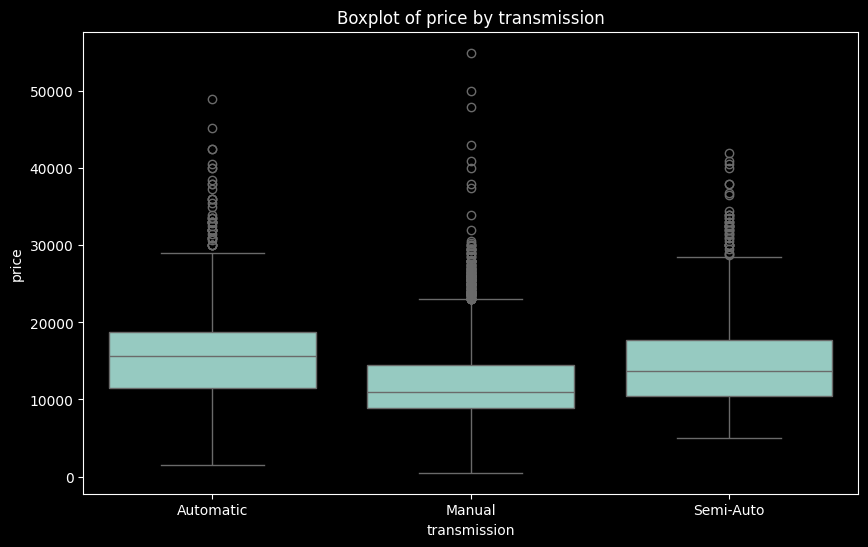

In [45]:
def create_boxplot(df, source_col, target_col):
    """
    Create a seaborn box plot showing the relationship between a source and a target attribute.

    :param df: The DataFrame containing the data.
    :param source_col: The column name in the DataFrame for the x-axis (source).
    :param target_col: The column name in the DataFrame for the y-axis (target).
    """
    # Ensure the specified columns exist in the DataFrame
    if source_col not in df.columns or target_col not in df.columns:
        raise ValueError(f"One or both of '{source_col}' and '{target_col}' are not in DataFrame")
    
    # Create the box plot
    plt.figure(figsize=(10, 6))
    ax = sns.boxplot(x=source_col, y=target_col, data=df)
    
    # Optional: Add titles and labels
    plt.title(f'Boxplot of {target_col} by {source_col}')
    plt.xlabel(source_col)
    plt.ylabel(target_col)
    
    # Display the plot
    plt.show()



source_col = 'transmission'
target_col = 'price'

create_boxplot(df, source_col, target_col)

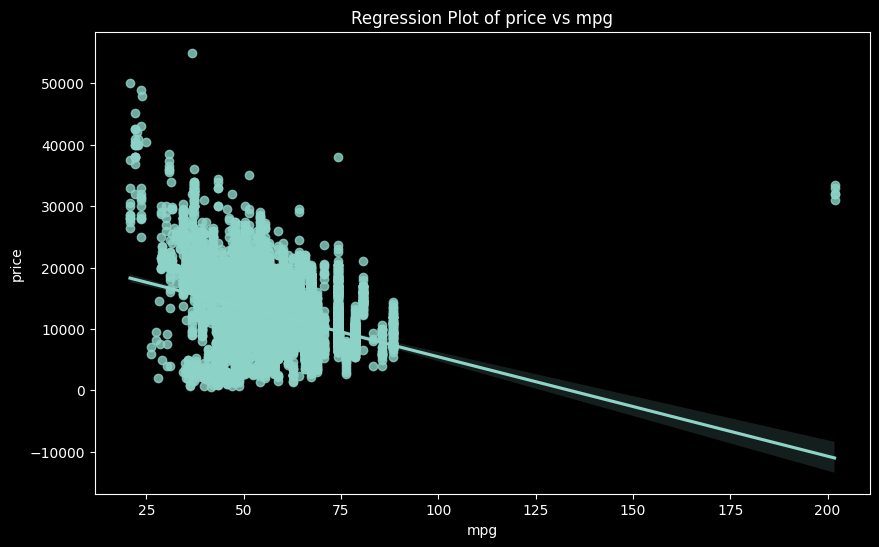

In [47]:
def create_regression_plot(df, source_col, target_col):
    """
    Create a scatter plot showing the relationship between a source and target attribute,
    optionally including a line of best fit (regression line).

    :param df: The DataFrame containing the data.
    :param source_col: The column name in the DataFrame for the x-axis (source).
    :param target_col: The column name in the DataFrame for the y-axis (target).
    """
    # Ensure the specified columns exist in the DataFrame
    if source_col not in df.columns or target_col not in df.columns:
        raise ValueError(f"One or both of '{source_col}' and '{target_col}' are not in DataFrame")
    
    plt.figure(figsize=(10, 6))
    ax = sns.regplot(x=source_col, y=target_col, data=df)  # seaborn's regplot adds a regression line by default

    # Add titles and labels
    plt.title(f'Regression Plot of {target_col} vs {source_col}')
    plt.xlabel(source_col)
    plt.ylabel(target_col)
    
    # Display the plot
    plt.show()

source_col = 'mpg'
target_col = 'price'

create_regression_plot(df, source_col, target_col)

R^2 Score: 0.1504
Mean Squared Error (MSE): 19049855.1401


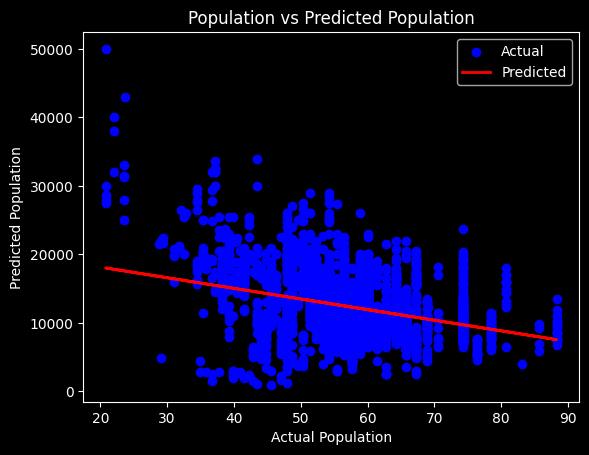

In [53]:


def fit_linear_regression(X, y, test_size=0.2, random_state=42):
    """
    Fit a linear regression model on the given source and target variables,
    calculate and print R^2 and MSE values.
  
    :param X: DataFrame containing the source variable.
    :param y: Series/array of the target variable.
    :param test_size: Proportion of the data to use as test set.
    :param random_state: Seed for reproducibility.
    """
    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Initialize and fit the linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate R^2 and MSE
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    print(f"R^2 Score: {r2:.4f}")
    print(f"Mean Squared Error (MSE): {mse:.4f}")

    return model, r2, mse,X_test,y_test,y_pred



# Source variable is 'Population' and target variable is 'Population' (for simplicity)
X = df[['mpg']]
X
y = df['price']
y
model, r2, mse,X_test,y_test,y_pred = fit_linear_regression(X, y)


# Optionally, we can visualize the data and the regression line
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.title('Population vs Predicted Population')
plt.xlabel('Actual Population')
plt.ylabel('Predicted Population')
plt.legend()
plt.show()

In [56]:
def fit_linear_regression(X, y, test_size=0.2, random_state=42):
    """
    Fit a linear regression model on the given set of source variables and target variable,
    calculate and print R^2 and MSE values.

    :param X: DataFrame containing the source variables.
    :param y: Series/array of the target variable.
    :param test_size: Proportion of the data to use as test set.
    :param random_state: Seed for reproducibility.
    """
    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Initialize and fit the linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate R^2 and MSE
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    print(f"R^2 Score: {r2:.4f}")
    print(f"Mean Squared Error (MSE): {mse:.4f}")

    return model, r2, mse,X_test


# Source variables are 'Income' and 'Population', target variable is 'Population'
X = df[['year', 'mileage', 'tax', 'mpg' , 'engineSize']]
y = df['price']

model, r2, mse,X_test = fit_linear_regression(X, y)

# Optionally, we can inspect the coefficients of the model
print("Linear Regression Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


R^2 Score: 0.6917
Mean Squared Error (MSE): 6912744.9107
Linear Regression Coefficients: [ 1.29263296e+03 -5.20206503e-02  5.99816688e-01 -8.24531351e+01
  5.37168892e+03]
Intercept: -2596110.7991622877


In [58]:
def fit_pipeline_model(X, y, test_size=0.2, random_state=42):
    """
    Fit a pipeline (StandardScaler + PolynomialFeatures + LinearRegression) on the given source variables.
    Calculate and print R^2 and MSE values.

    :param X: DataFrame containing the source variables.
    :param y: Series/array of the target variable.
    :param test_size: Proportion of the data to use as test set.
    :param random_state: Seed for reproducibility.
    """
    # Define the pipeline
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('poly', PolynomialFeatures(degree=2)),  # Polynomial features of degree 2
        ('regressor', LinearRegression())
    ])

    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = pipeline.predict(X_test)

    # Calculate R^2 and MSE
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    print(f"R^2 Score: {r2:.4f}")
    print(f"Mean Squared Error (MSE): {mse:.4f}")

    return pipeline, r2, mse


# Source variables are 'Income' and 'Population', target variable is 'Population'
X = df[['year', 'mileage', 'tax', 'mpg' , 'engineSize']]
y = df['price']

pipeline, r2, mse = fit_pipeline_model(X, y)

# Optionally, we can inspect the coefficients of the model
print("Linear Regression Coefficients:", pipeline.named_steps['regressor'].coef_)
print("Intercept:", pipeline.named_steps['regressor'].intercept_)

R^2 Score: 0.1212
Mean Squared Error (MSE): 19704749.6149
Linear Regression Coefficients: [ 0.00000000e+00  3.38001583e+03 -9.90423254e+02 -8.09617949e+01
 -8.53623483e+02  2.29648400e+03  3.24356556e+02 -2.08590333e+02
  3.29197090e+02 -7.62133235e+01  1.50675834e+02 -1.53644750e+01
  3.78553616e+01 -3.35565478e+01 -2.93658900e+01  1.98708599e+01
  5.23307918e+01  9.55865291e+01  8.35817903e+01  4.23011472e+01
  2.81981488e-01]
Intercept: 11669.762610252981


In [61]:
def evaluate_ridge_regression(df, source_cols, target_col, test_size=0.2, alpha=0.1):
    """
    Evaluate a Ridge Regression model on a given DataFrame.

    :param df: DataFrame with source attributes and target variable.
    :param source_cols: List of source attribute column names.
    :param target_col: Target variable column name.
    :param test_size: Proportion of the dataset to include in the test split.
    :param alpha: Regularization parameter for Ridge Regression.
    :return: Mean Squared Error (MSE) and R^2 score.
    """
    # Split the data into features (X) and target (y)
    X = df[source_cols]
    y = df[target_col]

    # Split the data into training (80%) and testing (20%) sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    # Apply polynomial features (degree 2) to both training and testing data
    poly = PolynomialFeatures(degree=2)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    # Initialize and fit the Ridge Regression model
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_poly, y_train)

    # Generate predictions on the test set
    y_pred = ridge.predict(X_test_poly)

    # Calculate performance metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"R^2 Score: {r2:.4f}")

    return mse, r2


source_cols = ['year', 'mileage', 'tax', 'mpg' , 'engineSize']
target_col = 'price'


mse, r2 = evaluate_ridge_regression(df, source_cols, target_col)

Mean Squared Error (MSE): 7326174.8781
R^2 Score: 0.6733


d:\Git Project\Cousera\data_science\.venv\lib\site-packages\sklearn\linear_model\_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=2.17676e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
